# Лабораторная работа 1

## DFT и FFT

In [3]:
import time
from numpy import linspace, cos, sin, pi, absolute, arange, pi, asarray, exp, dot
from numpy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

X_timer = []
Y_timer = []

def timing(f):
    def wrap(*args):
        time1 = time.time()
        ret = f(*args)
        time2 = time.time()
        Y_timer.append(time2 - time1)
        return ret
    return wrap


def plotMe(x, y, title='', xlabel='', ylabel=''):
    plt.plot(x, y, 'ro')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()


def DFT(y):
    y = asarray(y, dtype=float)
    N = y.shape[0]
    n = arange(N)
    k = n.reshape((N, 1))
    M = exp(-2j * pi * k * n / N)
    return dot(M, y)

@timing
def FFT(fft_func, signal_func, signal_freq, signal_duration=1.0, need_plot=True):
    # Sampling rate
    fs = signal_freq*4  # Hz
    N = fs * signal_duration
    t = linspace(0, signal_duration, num=N, endpoint=False, dtype=float)

    # for timer
    X_timer.append(len(t))

    # Generate a sinusoid at frequency f
    f = signal_freq  # Hz
    a = signal_func(2 * pi * f * t)
    # print('Input signal size = ' + str(a.size))

    # Plot signal, showing how endpoints wrap from one chunk to the next
    if(need_plot):
        plt.subplot(2, 1, 1)
        plt.plot(t, a, '.-')
        plt.margins(0.1, 0.1)
        plt.xlabel('Time [s]')

    # Use FFT to get the amplitude of the spectrum
    ampl = 1/N * absolute(fft_func(a))


    if(need_plot):
        # FFT frequency bins
        freqs = fftfreq(int(N), 1 / fs)

        plt.subplot(2, 1, 2)
        plt.stem(fftshift(freqs), fftshift(ampl))
        plt.margins(0.1, 0.1)
        plt.xlabel('Frequency [Hz]')
        plt.tight_layout()
        plt.show()

## Сравнение скроости работы обычного DFT и FFT

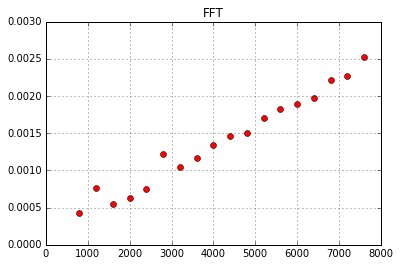

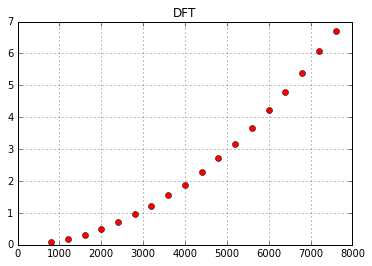

In [8]:
time_ = arange(0.1, 1, 0.05)

X_timer.clear()
Y_timer.clear()

for t in time_:
    FFT(fft, sin, 2000, t, False)

plotMe(X_timer, Y_timer, 'FFT')

X_timer.clear()
Y_timer.clear()

for t in time_:
    FFT(DFT, sin, 2000, t, False)

plotMe(X_timer, Y_timer, 'DFT')


Как видно по графикам, разница идет на порядки.

## Графики FFT и DFT

FFT sin


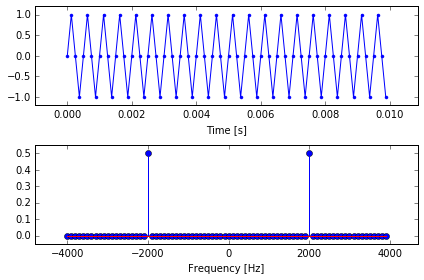

FFT cos


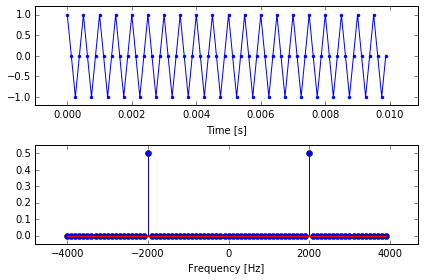

DFT sin


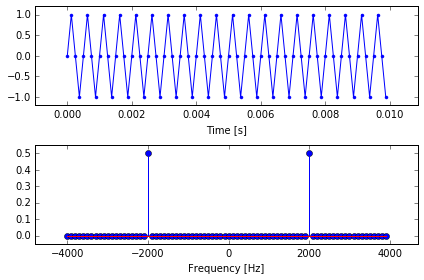

DFT cos


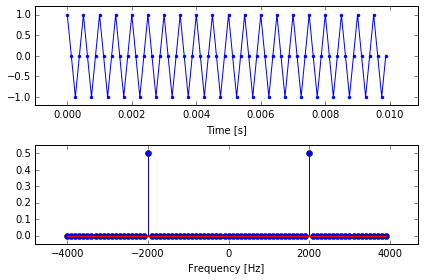

In [10]:
print('FFT sin')
FFT(fft, sin, 2000, 0.01, True)

print('FFT cos')
FFT(fft, cos, 2000, 0.01, True)


print('DFT sin')
FFT(DFT, sin, 2000, 0.01, True)

print('DFT cos')
FFT(DFT, cos, 2000, 0.01, True)

## Перцептрон

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)
    plt.grid()
    plt.show()


x0 = 0
x1 = 0
x2 = 0


def my_formula(x):
    return x ** x2 + x * x1 + x0

def my_formula(x):
    return x * x1 + x0


def activation_func_binary_step(x):
    return 1.0 if x >= 0.0 else 0.0


def activation_func_logistic(x):
    return 1 / (1 + np.exp(-x))

def diff_logistic_func(x):
    return np.exp(-x)/(np.exp(-x)+1)**2


def activation_func_tanh(x):
    return np.tanh(x)


# Make a prediction with weights
def predict(row, weights, act_func):
    activation = weights[0]
    for i in range(len(row) - 1):
        activation += weights[i + 1] * row[i]
    return act_func(activation)


# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch, act_func):
    weights = [0.0 for _ in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights, act_func)
            error = row[-1] - prediction
            sum_error += error ** 2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row) - 1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>> epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights


def plot_act_func(l_rate, n_epoch, dataset, act_func, plot_x):
    weights = train_weights(dataset, l_rate, n_epoch, act_func)
    print(weights)

    global x0, x1, x2
    x0 = weights[0]
    x1 = weights[1]
    x2 = weights[2]
    graph(my_formula, np.arange(plot_x[0], plot_x[1], 0.1))

def plot_activation_func_binary_step():
    nums = np.arange(-5, 5, step=0.5)
    y = []
    for n in nums:
        y.append(activation_func_binary_step(n))
    y = np.array(y)
    plt.plot(nums, y, 'r')
    plt.axis([-6, 6, -0.5, 1.5])
    plt.grid()
    plt.show()

def plot_activation_func_logistic():
    nums = np.arange(-5, 5, step=0.5)
    plt.plot(nums, activation_func_logistic(nums), 'r')
    plt.axis([-6, 6, -0.5, 1.5])
    plt.grid()
    plt.show()


def plot_activation_diff_func_logistic():
    nums = np.arange(-5, 5, step=0.5)
    plt.plot(nums, diff_logistic_func(nums), 'r')
    plt.axis([-6, 6, -0.5, 1])
    plt.grid()
    plt.show()

def plot_activation_func_tanh():
    nums = np.arange(-5, 5, step=0.5)
    plt.plot(nums, activation_func_tanh(nums), 'r')
    plt.axis([-6, 6, -1.5, 1.5])
    plt.grid()
    plt.show()


**Графики функций активации**

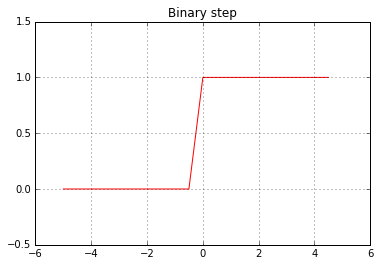

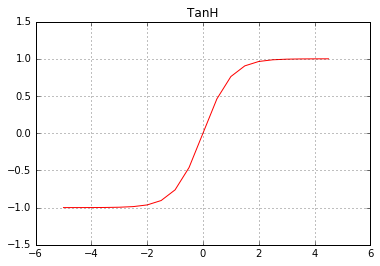

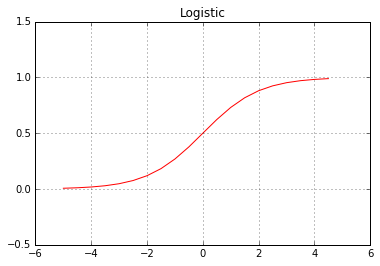

In [5]:
# plot activation functions
plot_activation_func_binary_step()
plot_activation_func_tanh()
plot_activation_func_logistic()

**Производная сигмоиды**

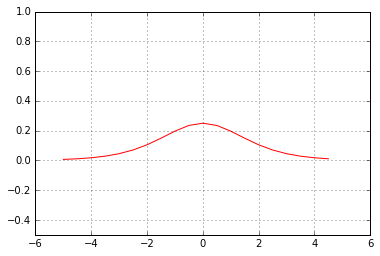

In [17]:
# plot sigmoid diff
plot_activation_diff_func_logistic()

**Обучение методом стохастического градиента (для примера использования функций активации)**

In [14]:
df = pd.read_csv('data.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
df.head(10)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


Use Binary step activation function
>> epoch=0, lrate=0.030, error=44.000
>> epoch=1, lrate=0.030, error=43.000
>> epoch=2, lrate=0.030, error=40.000
>> epoch=3, lrate=0.030, error=43.000
>> epoch=4, lrate=0.030, error=46.000
[-1.0200000000000007, 1.296648991383467, 1.6767463561475275]


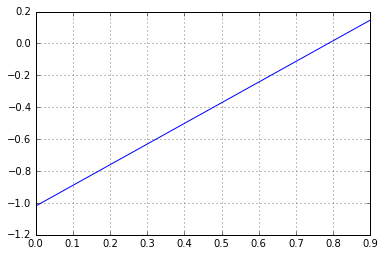

Use Logistic (a.k.a. Soft step) activation function
>> epoch=0, lrate=0.030, error=42.250
>> epoch=1, lrate=0.030, error=43.999
>> epoch=2, lrate=0.030, error=43.975
>> epoch=3, lrate=0.030, error=45.999
>> epoch=4, lrate=0.030, error=43.000
[-1.1248791654506252, 2.3797481536197935, 0.76344578701483834]


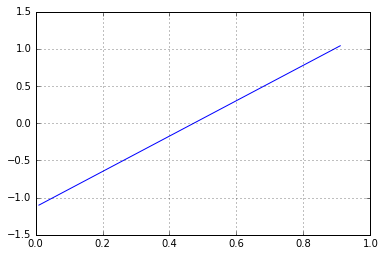

Use TanH activation function
>> epoch=0, lrate=0.030, error=66.000
>> epoch=1, lrate=0.030, error=79.273
>> epoch=2, lrate=0.030, error=84.000
>> epoch=3, lrate=0.030, error=79.821
>> epoch=4, lrate=0.030, error=79.999
[-1.1918689092319759, 4.0139973188883715, 2.514828447455471]


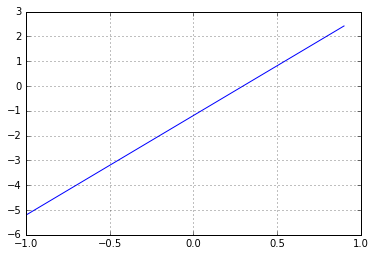

In [15]:
l_rate = 0.03
n_epoch = 5

print('Use Binary step activation function')
plot_act_func(l_rate, n_epoch, df.values.tolist(), activation_func_binary_step, [0, 1])

print('Use Logistic (a.k.a. Soft step) activation function')
plot_act_func(l_rate, n_epoch, df.values.tolist(), activation_func_logistic, [0.01, 1])

print('Use TanH activation function')
plot_act_func(l_rate, n_epoch, df.values.tolist(), activation_func_tanh, [-1, 1])